In [11]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from load import load_pseudo, load_staph, load_nucleotides

%matplotlib inline

In [2]:
records_pseudo = load_pseudo()
records_staph = load_staph()

In [3]:
def show_count(rects):
    '''Show the height of each bar in the bar chart'''
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                     xy=(rect.get_x() + rect.get_width()/2, height),
                     ha='center', va='bottom')

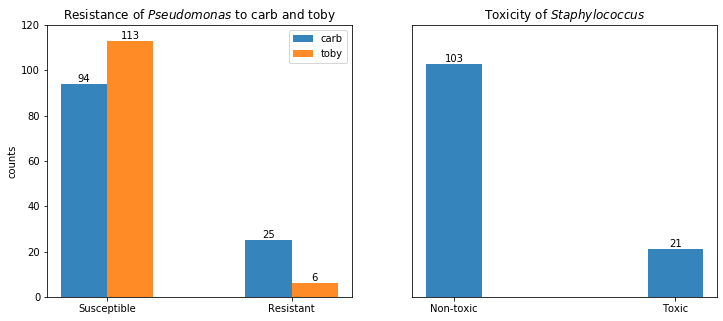

In [4]:
# show the distribution of classes
plt.figure(figsize=(12, 5))
plt.subplot('121')

# pseudo
x = np.array([0, 1]) # False, True
counts_carb = records_pseudo['carb'].value_counts()
carb = plt.bar(x=x-0.125, height=counts_carb, width=0.25, alpha=0.9, label='carb')
counts_toby = records_pseudo['toby'].value_counts()
toby = plt.bar(x=x+0.125, height=counts_toby, width=0.25, alpha=0.9, label='toby')
show_count(carb)
show_count(toby)
plt.xticks(x, ['Susceptible', 'Resistant'])
plt.ylim((0, 120))
plt.ylabel('counts')
plt.title('Resistance of $Pseudomonas$ to carb and toby')
plt.legend()

#staph
plt.subplot('122')
resp_counts = records_staph['resp'].value_counts()
rects = plt.bar(x=x, height=resp_counts, width=0.25, alpha=0.9)
show_count(rects)
plt.xticks(x, ['Non-toxic', 'Toxic'])
plt.ylim((0, 120))
plt.yticks([])
plt.title('Toxicity of $Staphylococcus$')

plt.show()

In [5]:
def missingness(ax, data):
    n, bins, patches = ax.hist(data, bins=30, alpha=0.9)
    mu, sigma = np.mean(data), np.std(data)
    ax.grid(True)
    x = sum(ax.get_xlim()) / 2
    y = sum(ax.get_ylim()) / 1.5
    ax.text(mu, y, '$\mu={:.3}, \sigma={:.3}$'.format(mu, sigma))

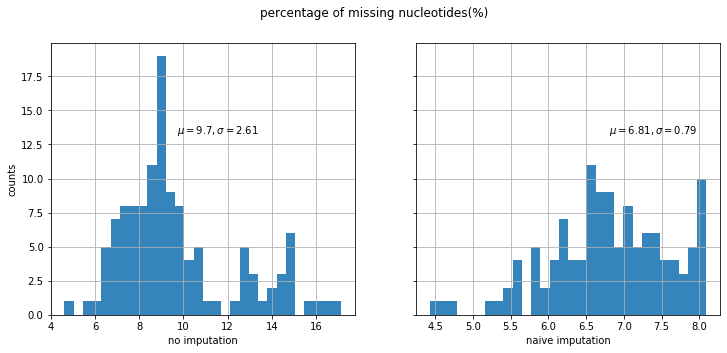

In [6]:
# show missingness distribution
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 5))
missingness(ax1, records_pseudo['missing_%'])
ax1.set_ylabel('counts')
ax1.set_xlabel('no imputation')
missingness(ax2, records_pseudo['missing_%_i'])
ax2.set_xlabel('naive imputation')

fig.suptitle('percentage of missing nucleotides(%)')
plt.show()

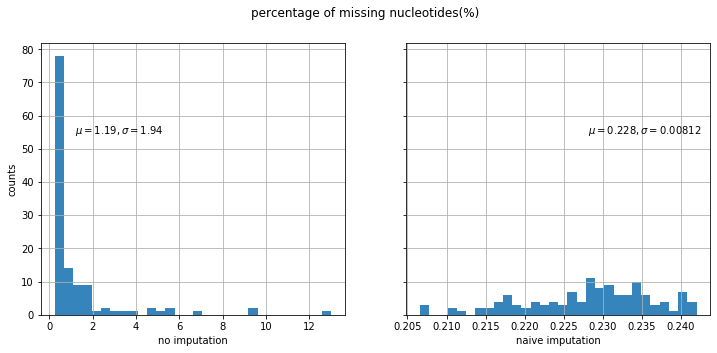

In [7]:
# staph
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 5))
missingness(ax1, records_staph['missing_%'])
ax1.set_ylabel('counts')
ax1.set_xlabel('no imputation')
missingness(ax2, records_staph['missing_%_i'])
ax2.set_xlabel('naive imputation')

fig.suptitle('percentage of missing nucleotides(%)')
plt.show()

In [37]:
# show the individual missingness of the sequence
def individual_missingness(records):
    plt.figure(figsize=(19.2, 4.8))
    l = records.shape[0]
    o = plt.scatter(range(l), records['missing_%'])
    i = plt.scatter(range(l), records['missing_%_i'])

    plt.legend(handles=[o, i], labels=['original', 'imputed'])
    plt.xlim((-1, records.shape[0]))
    plt.ylim((0, np.ceil(np.max(records['missing_%']))))
    plt.xticks(ticks=range(l), labels=records['id'].to_list(), rotation=90, fontsize=9)
    plt.ylabel('percentage of missing nucleotides(%)')
    plt.title('Individual percentage of missing nucleotides')
    plt.grid(axis='y')
    plt.show()

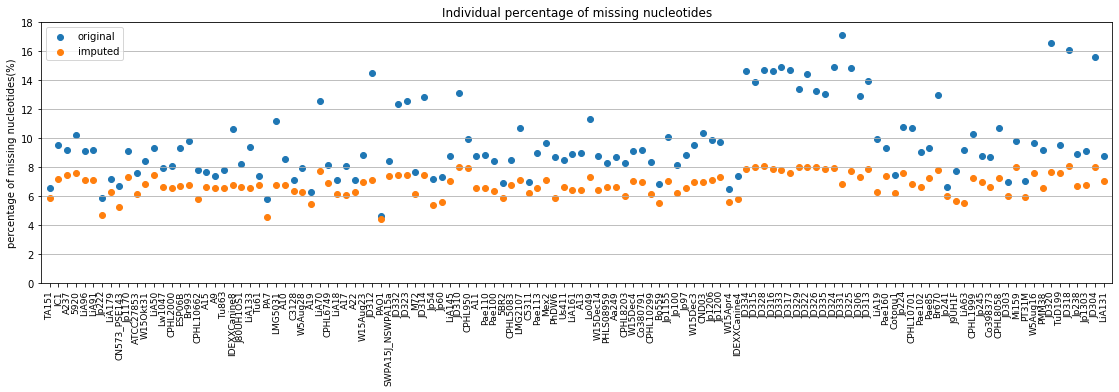

In [38]:
individual_missingness(records_pseudo)

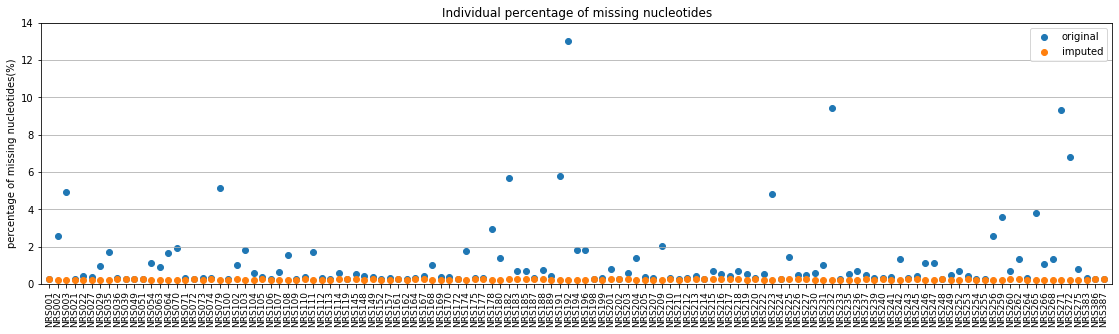

In [39]:
individual_missingness(records_staph)

In [16]:
# ratio of different nucleotides in total
c_pseudo = Counter()
for seq in records_pseudo['sequence']:
    c_pseudo.update(Counter(seq))
    
c_staph = Counter()
for seq in records_staph['sequence']:
    c_staph.update(Counter(seq))

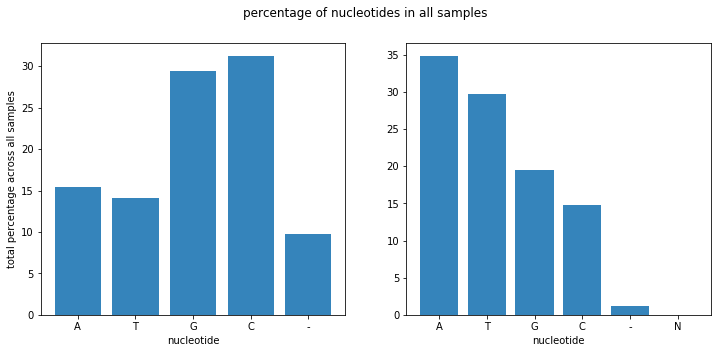

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot('121')

total = pd.Series(c_pseudo)
total /= (total.sum() / 100)
plt.bar(x=total.index, height=total, alpha=0.9)
plt.xlabel('nucleotide')
plt.ylabel('total percentage across all samples')

plt.subplot('122')

total = pd.Series(c_staph)
total /= (total.sum() / 100)
plt.bar(x=total.index, height=total, alpha=0.9)
plt.xlabel('nucleotide')

plt.suptitle('percentage of nucleotides in all samples')
plt.show()

In [12]:
%time sequence_pseudo = load_nucleotides('../data/pseudo/concatenated.fasta')

CPU times: user 48.6 s, sys: 877 ms, total: 49.5 s
Wall time: 45.7 s


In [12]:
variations_pseudo = []
for locus, content in sequence_pseudo.items():
    variations_pseudo.append(len(Counter(content)))

In [13]:
%time sequence_staph = load_nucleotides('../data/staph/core_gene_alignment-narsa.aln')

CPU times: user 1min 29s, sys: 1.35 s, total: 1min 31s
Wall time: 1min 24s


In [14]:
variations_staph = []
for locus, content in sequence_staph.items():
    variations_staph.append(len(Counter(content)))

In [15]:
np.save('../data/pseudo/pseudo_gene_variations.npy', np.array(variations_pseudo))
np.save('../data/staph/staph_gene_variations.npy', np.array(variations_staph))

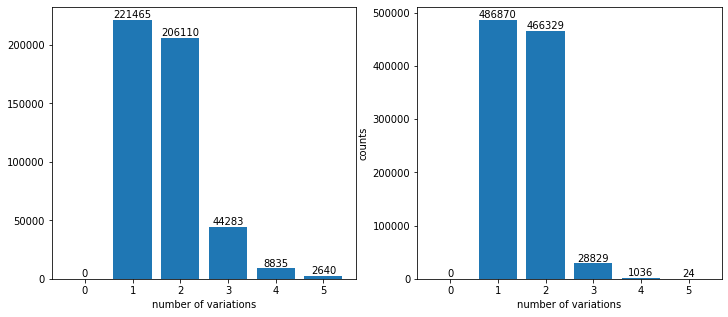

In [16]:
plt.figure(figsize=(12, 5))

plt.subplot('121')
counts = np.bincount(variations_pseudo)
rects = plt.bar(range(len(counts)), counts)
show_count(rects)
plt.xlabel('number of variations')

plt.subplot('122')
counts = np.bincount(variations_staph)
rects = plt.bar(range(len(counts)), counts)
show_count(rects)
plt.xlabel('number of variations')
plt.ylabel('counts')
plt.show()

In [21]:
%time missing_pseudo = sequence_pseudo != '-'

CPU times: user 1min 41s, sys: 985 ms, total: 1min 42s
Wall time: 1min 35s


In [22]:
%time sequence_pseudo_imputed = load_nucleotides('../data/pseudo/concatenated_naive_impute.fasta')

In [23]:
%time missing_pseudo_imputed = sequence_pseudo_imputed != '-'

CPU times: user 1min 42s, sys: 1.04 s, total: 1min 43s
Wall time: 1min 36s


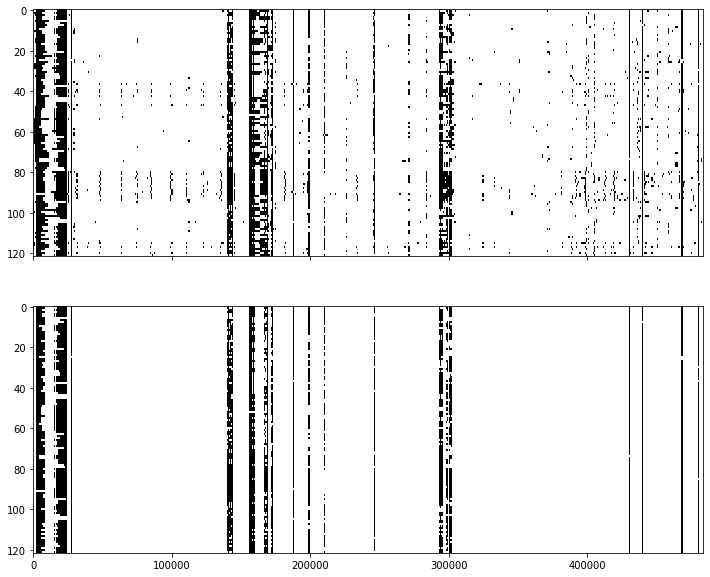

In [24]:
# plot missingness (black is missingness)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 10))
ax1.imshow(missing_pseudo, aspect='auto', cmap='gray')
plt.imshow(missing_pseudo_imputed, aspect='auto', cmap='gray')
plt.show()

In [27]:
%time missing_staph = sequence_staph != '-'

CPU times: user 3min 22s, sys: 2.08 s, total: 3min 24s
Wall time: 3min 16s


In [14]:
%time sequence_staph_imputed = load_nucleotides('../data/staph/core_gene_alignment-narsa_naive_impute.fasta')

CPU times: user 1min 28s, sys: 1.05 s, total: 1min 30s
Wall time: 1min 23s


In [15]:
%time missing_staph_imputed = sequence_staph_imputed != '-'

CPU times: user 3min 19s, sys: 2.15 s, total: 3min 21s
Wall time: 3min 13s


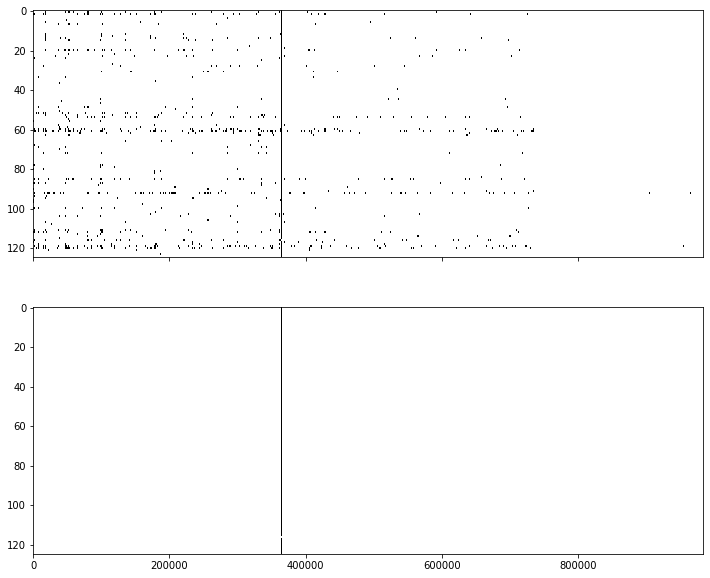

In [28]:
# plot missingness (black is missingness)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 10))
ax1.imshow(missing_staph, aspect='auto', cmap='gray')
plt.imshow(missing_staph_imputed, aspect='auto', cmap='gray')
plt.show()